In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [45]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


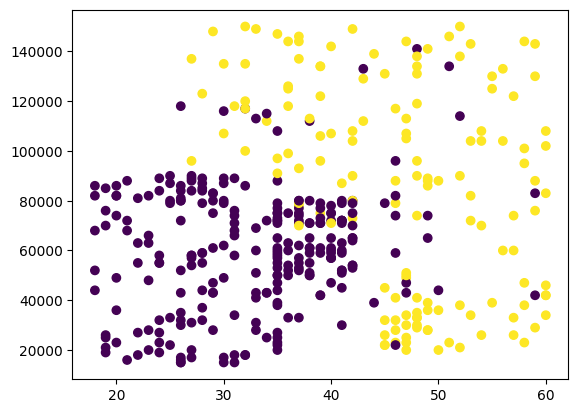

In [46]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [47]:
df = df.drop(columns = ['User ID','Gender'])

In [48]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sk = StandardScaler()

In [51]:
X = sk.fit_transform(X)

In [52]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()

model.add(Dense(5,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(3,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44 (176.00 B)

 Trainable params: 44 (176.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.get_weights()

[array([[-0.15745282, -1.6306704 , -0.39944208,  1.3744689 ,  0.73078334],
        [ 0.0388304 , -1.6582882 ,  0.89111054, -0.32371926,  0.9113387 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.9472109 ,  0.46639   ,  0.2737521 ],
        [-0.76461935, -0.7156306 ,  0.5699692 ],
        [ 0.7609378 , -1.0409834 , -0.46005726],
        [ 1.0371811 , -1.0499313 ,  1.0737157 ],
        [ 1.0584381 ,  0.6073456 ,  0.2640853 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.06974125,  1.0790826 ],
        [-0.69957125, -0.9514263 ],
        [ 1.1899418 , -0.0067209 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2382057 ],
        [-0.14254844]], dtype=float32),
 array([0.], dtype=float32)]

In [55]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
history = model.fit(X,y,epochs=300,validation_split=0.2)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7225 - loss: 0.7757 - val_accuracy: 0.3625 - val_loss: 2.0402
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7327 - loss: 0.8264 - val_accuracy: 0.3625 - val_loss: 1.9433
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6655 - loss: 0.7928 - val_accuracy: 0.3375 - val_loss: 1.8527
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7069 - loss: 0.7672 - val_accuracy: 0.3250 - val_loss: 1.7689
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6778 - loss: 0.7562 - val_accuracy: 0.3125 - val_loss: 1.6903
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7031 - loss: 0.6732 - val_accuracy: 0.3000 - val_loss: 1.6207
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6785 - loss: 0.6815 - val_accuracy: 0.3000 - val_loss: 1.5547
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7010 - loss: 0.6066 - val_accuracy: 0.3000 - 

In [57]:
model.get_weights()

[array([[-0.2497496 , -2.202419  , -0.32628006,  1.1825428 ,  0.35919032],
        [ 0.34549418, -1.2201838 ,  1.4787639 , -0.7854492 ,  1.1057017 ]],
       dtype=float32),
 array([ 0.7766656 ,  0.19162112,  0.21421161, -0.03241092, -0.09403879],
       dtype=float32),
 array([[-1.5514169 ,  0.51761055,  0.9914526 ],
        [ 0.07222234, -1.558336  ,  1.0714731 ],
        [ 1.329079  , -0.9378512 , -1.0208135 ],
        [ 1.8340695 , -2.1361747 ,  0.6657742 ],
        [ 1.239426  ,  0.41505355,  0.02532021]], dtype=float32),
 array([0.19133721, 0.05262548, 0.23879805], dtype=float32),
 array([[-0.6158527 ,  1.3560392 ],
        [-1.4076492 , -0.76886827],
        [ 1.230832  ,  0.04262062]], dtype=float32),
 array([ 0.24225679, -0.11703148], dtype=float32),
 array([[-1.6924394],
        [ 0.3055509]], dtype=float32),
 array([0.01301323], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

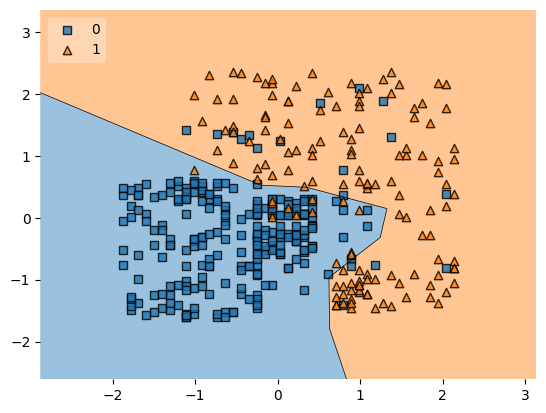

In [58]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)